# Exploratory Data Analysis

This notebook contains descriptive statistics regarding our collected data. First, we start by analyzing the variables in our dataset.

In [6]:
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#ONLY RUN THIS ONCE
os.chdir("..")
os.path.abspath(os.curdir)

'/Users/claireboyd/courses/advanced_ml/dirty_comments_and_clean_plates'

## 1. Descriptive Statistics

In [10]:
# Overview
with open('data/phila/labeled_inspections_with_reviews.csv', newline='') as csvfile:
    data = pd.read_csv(csvfile, delimiter=',')
data.head()

,Unnamed: 0,Organization Name,Active Indicator,Public Facility Name,Program Group Type,Address,City,County Name,Zip Code,State,...,is_open,attributes,categories,hours,prev_date,prev_date_with_nulls,reviews,ratings,n_reviews,avg_rating
0,10735,Chester County Health Department,Yes,"158 LICENSE, LLC",ChesterCountyFood,158 W GAY ST,West Chester,Chester,19380.0,PA,...,0.0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Restaurants, American (New)","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",NaN,2018-03-25 00:00:00,"[""Our first visit here and probably won't be b...","[1.0, 3.0, 1.0, 5.0, 1.0, 5.0, 1.0, 2.0, 5.0, ...",11,2.454545
1,56848,PENNSYLVANIA DEPARTMENT OF AGRICULTURE,Yes,3 B'S LOUNGE,Food,309 S MAIN ST,ZELIENOPLE,Butler,16063.0,PA,...,1.0,"{'RestaurantsGoodForGroups': 'True', 'Business...","American (Traditional), Bars, Nightlife, Sandw...","{'Monday': '11:30-0:0', 'Tuesday': '11:30-0:0'...",NaN,2017-05-21 00:00:00,"['Stopped in for happy hour last night, first ...","[4.0, 5.0]",2,4.500000
2,72731,PENNSYLVANIA DEPARTMENT OF AGRICULTURE,Yes,3 B'S LOUNGE,Food,309 S MAIN ST,ZELIENOPLE,Butler,16063.0,PA,...,1.0,"{'RestaurantsGoodForGroups': 'True', 'Business...","American (Traditional), Bars, Nightlife, Sandw...","{'Monday': '11:30-0:0', 'Tuesday': '11:30-0:0'...",2018-05-16 00:00:00,2018-05-16 00:00:00,['Six of us went here for an early Saturday lu...,"[5.0, 1.0, 4.0, 5.0, 1.0, 5.0, 4.0]",7,3.571429
3,289,Chester County Health Department,Yes,30 MAIN,ChesterCountyFood,660 LANCASTER AVE,Berwyn,Chester,19312.0,PA,...,1.0,"{'RestaurantsPriceRange2': '2', 'GoodForMeal':...","American (New), Bars, Venues & Event Spaces, N...","{'Tuesday': '16:0-22:0', 'Wednesday': '16:0-22...",NaN,2017-05-08 00:00:00,"[""So I read all the reviews and was having sec...","[2.0, 5.0, 5.0, 3.0, 4.0, 2.0, 1.0, 1.0, 5.0, ...",11,3.363636
4,15080,Chester County Health Department,Yes,30 MAIN,ChesterCountyFood,660 LANCASTER AVE,Berwyn,Chester,19312.0,PA,...,1.0,"{'RestaurantsPriceRange2': '2', 'GoodForMeal':...","American (New), Bars, Venues & Event Spaces, N...","{'Tuesday': '16:0-22:0', 'Wednesday': '16:0-22...",2018-05-03 00:00:00,2018-05-03 00:00:00,"['Ordered through Grub Hub, and the delivery c...","[1.0, 2.0, 5.0, 2.0, 1.0]",5,2.200000


### 1.1 Inspection Data

In this section we look into inspection data from the city of Philadelphia.

In [11]:
# Filter data
inspection_data = data[['Organization Name', 'Active Indicator', 'Public Facility Name', 'Program Group Type', 'Address', 'City', 'County Name', 'Zip Code', 'State', 'Inspection Date', 'Inspection Reason Type', 'Overall Compliance', 'Georeferenced Latitude and Longitude',]]

In [12]:
# Jurisdictions
num_organizations = len(inspection_data['Organization Name'].unique())
print(f'Health Inspection Jurisdiction ({num_organizations}):')
for org in list(inspection_data['Organization Name'].unique()):
    print(' - '+org.title()+';')

Health Inspection Jurisdiction (20):
 - Chester County Health Department;
 - Pennsylvania Department Of Agriculture;
 - Haverford Township;
 - Allentown City;
 - Emmaus Borough;
 - City Of Harrisburg;
 - Nanticoke City;
 - Bethlehem City;
 - City Of Easton Bureau Of Health;
 - Brookville Borough;
 - Jim Thorpe Borough;
 - Camp Hill Borough;
 - Brookhaven Borough;
 - Chambersburg Borough;
 - Lancaster City;
 - Greensburg City;
 - Northampton Borough;
 - City Of New Castle;
 - East Pennsboro Twp;
 - Bradford City;


In [13]:
# Active indicator
print('Status of restaurant:')
for status in inspection_data['Active Indicator'].unique():
    prop_status = inspection_data['Active Indicator'].value_counts().get(status, 0)/len(inspection_data['Active Indicator'])*100
    if status == 'Yes':
        print(f' - Active: {prop_status:.1f}%')
    else:
        print(f' - Inactive: {prop_status:.1f}%')

Status of restaurant:
 - Active: 93.9%
 - Inactive: 6.1%


In [14]:
# Public facility name
print('Inspected restaurants:', len(inspection_data['Public Facility Name'].unique()))

Inspected restaurants: 1057


In [15]:
# Geographic metrics
print('Cities covered:', len(inspection_data['City'].unique()))
print('Zip codes covered:', len(inspection_data['Zip Code'].unique()))
print('Counties covered:', len(inspection_data['County Name'].unique()))

Cities covered: 259
Zip codes covered: 217
Counties covered: 52


In [17]:
# Inspection Reason
print('Inspection Reasons:')
inspection_reasons = {}
for reason in inspection_data['Inspection Reason Type'].unique():
    prop_reason = inspection_data['Inspection Reason Type'].value_counts().get(reason, 0)/len(inspection_data['Inspection Reason Type'])*100
    inspection_reasons[reason] = prop_reason
while len(inspection_reasons)>0:
    reason = max(inspection_reasons, key=inspection_reasons.get)
    prop_reason = inspection_reasons.pop(reason)
    print(f' - {reason}: {prop_reason:.2f}'+'%')

Inspection Reasons:
 - Regular: 76.17%
 - Follow-up: 14.36%
 - Opening: 3.51%
 - Complaint: 3.19%
 - Change of Owner: 1.85%
 - Emergency Response: 0.46%
 - 2nd Follow Up: 0.28%
 - Type 2 Follow-up: 0.09%
 - Remodel: 0.05%
 - Food born Investigation: 0.05%


In [18]:
# Overall Compliance
print('Overall Compliance:')
for status in inspection_data['Overall Compliance'].unique():
    prop_status = inspection_data['Overall Compliance'].value_counts().get(status, 0)/len(inspection_data['Overall Compliance'])*100
    print(f' - {status}: {prop_status:.1f}%')

Overall Compliance:
 - Yes: 78.1%
 - No: 21.9%


In [19]:
# Inspection Date
inspection_data_date = inspection_data.copy()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
inspection_data_date.loc[:, 'Inspection Month'] = pd.to_datetime(inspection_data_date['Inspection Date'])
monthly_counts = inspection_data_date['Inspection Month'].dt.strftime('%B').value_counts().reindex(month_order)
print(monthly_counts)

Inspection Month
January      225
February     164
March        190
April        178
May          201
June         182
July         148
August       181
September    159
October      167
November     171
December     199
Name: count, dtype: int64


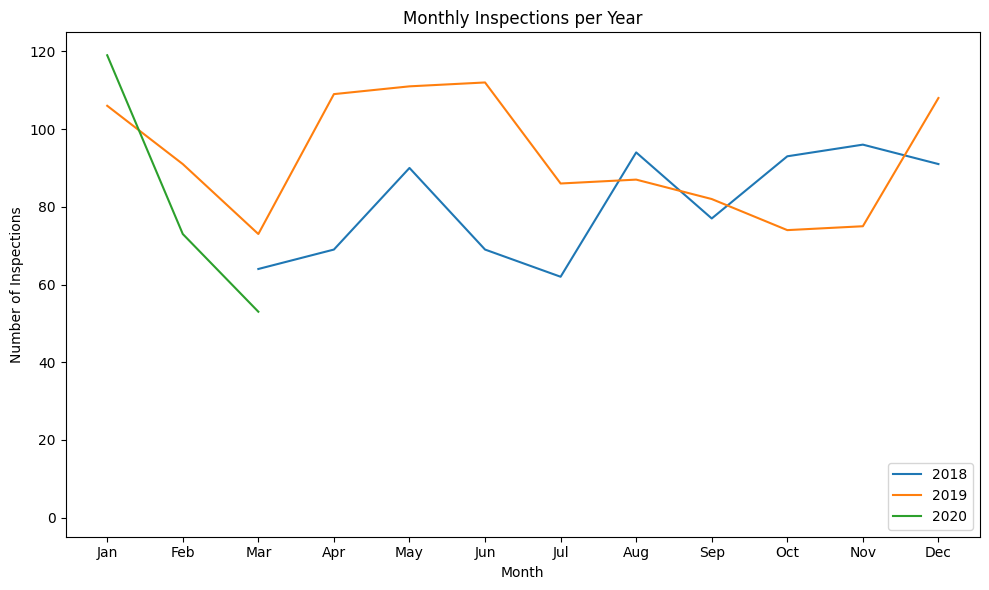

In [20]:
# Data Wrangling
inspection_data = inspection_data.copy()
inspection_data['Inspection Date'] = pd.to_datetime(inspection_data_date['Inspection Date'])
inspection_data['Inspection Month'] = inspection_data['Inspection Date'].dt.month
inspection_data['Inspection Year'] = inspection_data['Inspection Date'].dt.year

plot_data = inspection_data.groupby(['Inspection Year', 'Inspection Month']).size().unstack(fill_value=0)
plot_data.reset_index(inplace=True)
plot_data = plot_data.replace(0, None)

# Plot Monthly Inspections per Year
plt.figure(figsize=(10, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for year in plot_data['Inspection Year']:
    plt.plot(month_names, plot_data[plot_data['Inspection Year'] == year].values[0][1:], label=str(year))
plt.xlabel('Month')
plt.ylabel('Number of Inspections')
plt.title('Monthly Inspections per Year')
plt.xticks()
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### 1.2 Review Data

In [21]:
# Filter data
review_data = data[['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude','stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours','prev_date', 'prev_date_with_nulls', 'reviews', 'ratings', 'n_reviews', 'avg_rating']]
review_data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'prev_date',
       'prev_date_with_nulls', 'reviews', 'ratings', 'n_reviews',
       'avg_rating'],
      dtype='object')

In [22]:
# Restaurant Stars
pd.DataFrame(review_data['stars']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
stars,2165.0,3.625404,0.79238,1.0,3.0,3.5,4.0,5.0


In [23]:
# Restaurant Ratings
review_data = review_data.copy()
review_data['ratings'] = review_data['ratings'].apply(ast.literal_eval)
review_data['ratings'] = review_data['ratings'].apply(lambda x: [float(elem) for elem in x])

ratings = pd.DataFrame(review_data['ratings'])
stats_table = pd.DataFrame({
    'mean': review_data['ratings'].apply(np.mean),
    'std': review_data['ratings'].apply(np.std),
    'min': review_data['ratings'].apply(np.min),
    '25%': review_data['ratings'].apply(lambda x: np.percentile(x, 25)),
    '50%': review_data['ratings'].apply(lambda x: np.percentile(x, 50)),
    '75%': review_data['ratings'].apply(lambda x: np.percentile(x, 75)),
    'max': review_data['ratings'].apply(np.max),
    'count': review_data['ratings'].apply(len)
})
overall_stats = pd.DataFrame({
    'count': stats_table['count'].sum(),
    'mean': stats_table['mean'].mean(),
    'std': stats_table['std'].std(),
    'min': stats_table['min'].min(),
    '25%': stats_table['25%'].mean(),
    '50%': stats_table['50%'].mean(),
    '75%': stats_table['75%'].mean(),
    'max': stats_table['max'].max(),
}, index=[0])

overall_stats

,count,mean,std,min,25%,50%,75%,max
0,16897,3.592533,0.678685,1.0,3.155196,3.738106,4.159815,5.0


In [56]:
data.loc[data.loc[:, "Overall Compliance"] == "No", :][8:9]

,Unnamed: 0,Organization Name,Active Indicator,Public Facility Name,Program Group Type,Address,City,County Name,Zip Code,State,...,is_open,attributes,categories,hours,prev_date,prev_date_with_nulls,reviews,ratings,n_reviews,avg_rating
48,85,Chester County Health Department,Yes,AMAN'S BISTRO,ChesterCountyFood,277 SCHUYLKILL RD,Phoenixville,Chester,19460.0,PA,...,1.0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Restaurants, Buffets, Pakistani, Indian","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",NaN,2018-02-10 00:00:00,"[""DONT EAT THERE !!! Food taste awful and over...","[1.0, 5.0, 5.0, 3.0, 5.0, 5.0, 1.0, 5.0, 5.0, ...",14,4.071429


<Axes: xlabel='Overall Compliance'>

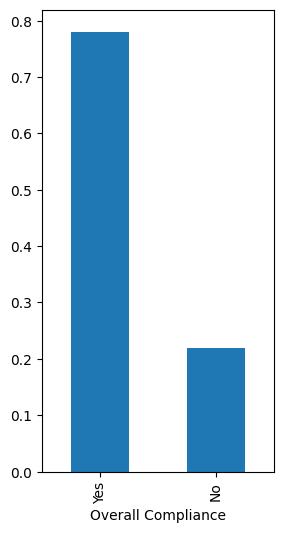

In [65]:
# Reviews per inspection
(data.loc[:, "Overall Compliance"].value_counts() / len(data)).plot.bar(figsize=(3,6))

In [889]:
# Open restaurants
print('Restaurant status:')
for status in sorted(review_data['is_open'].unique(), reverse=True):
    prop_status = review_data['is_open'].value_counts().get(status, 0)/len(review_data['is_open'])*100
    if status == 0:
        print(f' - Closed: {prop_status:.1f}%')
    else:
        print(f' - Open: {prop_status:.1f}%')

Restaurant status:
 - Open: 86.7%
 - Closed: 13.3%


In [909]:
# Restaurant categories (UNINFORMATIVE)
print('Number of categories:', len(review_data['categories'].unique()))
for i in range(10):
    print(review_data['categories'][i])

Number of categories: 740
Restaurants, American (New)
American (Traditional), Bars, Nightlife, Sandwiches, Restaurants, Burgers
American (Traditional), Bars, Nightlife, Sandwiches, Restaurants, Burgers
American (New), Bars, Venues & Event Spaces, Nightlife, Event Planning & Services, Restaurants
American (New), Bars, Venues & Event Spaces, Nightlife, Event Planning & Services, Restaurants
American (New), Bars, Venues & Event Spaces, Nightlife, Event Planning & Services, Restaurants
American (New), Bars, Venues & Event Spaces, Nightlife, Event Planning & Services, Restaurants
American (New), Bars, Venues & Event Spaces, Nightlife, Event Planning & Services, Restaurants
Shipping Centers, Local Services, Post Offices, Public Services & Government
Food, Restaurants, Burgers, Fast Food, Hot Dogs


In [903]:
# Restaurant reviews (SENTIMENT ANALYSIS WITH BERT)
review_data['reviews'] = review_data['reviews'].apply(ast.literal_eval)
review_data['reviews'][0]

["Our first visit here and probably won't be back.  Everything had a very unusual taste. The fried cauliflower was sour as though it was seasoned with vinegar. I ordered nachos....also sour. The chicken was peppery.  Not my fav.",
 "I would give it 3 stars for food and 4 for drinks. I went for happy hour and the drinks were cheap and yummy. The food was okay but nothing special. It was packed during happy hour and there was one bartender. She held her own but that's a lot of people for just her. Also, after it died down I was just hanging with friends and you had to flag down someone for just water even though it was empty\nand not much to do. \nI definitely would come back for drinks and even food but I would never pay full price.",
 "Went to landmark for my boyfriend's birthday for Game of Thrones trivia. I work in a restaurant, so i know it's hectic but our service was god awful. Our waitress came over and gave us menus and our friend ordered an app right away and we ordered drinks.

In [911]:
# Restaurant attributes
# review_data['attributes'] = review_data['attributes'].apply(ast.literal_eval)
review_data['attributes'][0]

{'RestaurantsPriceRange2': '2',
 'RestaurantsAttire': "u'casual'",
 'BusinessAcceptsCreditCards': 'True',
 'OutdoorSeating': 'True',
 'RestaurantsTakeOut': 'True',
 'HasTV': 'True',
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsReservations': 'True',
 'NoiseLevel': "u'average'",
 'BikeParking': 'True',
 'RestaurantsDelivery': 'False',
 'WiFi': "u'free'",
 'Alcohol': "u'full_bar'",
 'HappyHour': 'True',
 'Caters': 'False',
 'GoodForKids': 'True',
 'GoodForMeal': "{'dessert': False, 'latenight': True, 'lunch': False, 'dinner': True, 'brunch': False, 'breakfast': False}",
 'Ambience': "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}",
 'BusinessParking': "{'garage': True, 'street': True, 'validated': False, 'lot': False, 'valet': False}"}